In [2]:
import numpy as np
import pandas as pd
from pandas import Series , DataFrame
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']
# 解决负号显示问题
plt.rcParams['axes.unicode_minus'] = False

In [3]:
di = 'user_action.csv'
tb = pd.read_csv(di)
tb.shape

(12256906, 5)

In [4]:
tb.isnull().sum()

user_id          0
item_id          0
behavior_type    0
item_category    0
time             0
dtype: int64

In [5]:
tb['time'] = pd.to_datetime(tb['time'])

In [6]:
tb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12256906 entries, 0 to 12256905
Data columns (total 5 columns):
 #   Column         Dtype         
---  ------         -----         
 0   user_id        int64         
 1   item_id        int64         
 2   behavior_type  int64         
 3   item_category  int64         
 4   time           datetime64[ns]
dtypes: datetime64[ns](1), int64(4)
memory usage: 467.6 MB


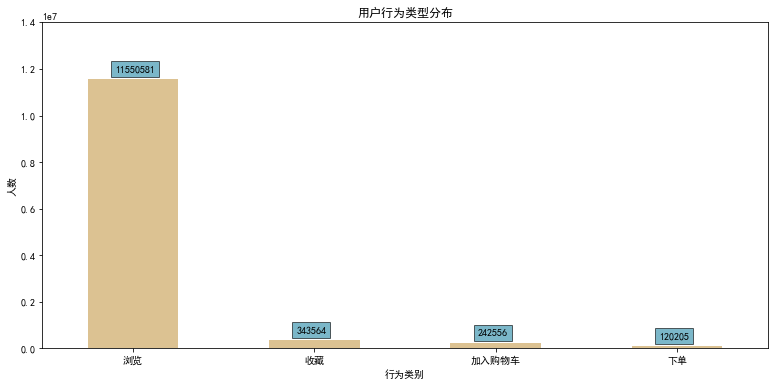

In [7]:
shiv = tb['behavior_type'].value_counts()
plt.figure(figsize = (13,6))
shiv.plot(kind='bar',color='#bb8727',alpha = 0.5)
plt.xlabel('行为类别')
plt.ylabel('人数')
plt.title('用户行为类型分布')
plt.xticks(np.arange(4),['浏览','收藏','加入购物车','下单'],rotation = 0)
plt.ylim([0,14000000])
for x,y in zip(np.arange(4),shiv.values):
    plt.text(x-0.1,y+300000,y,bbox=dict(facecolor = '#2387a5',alpha = 0.6))


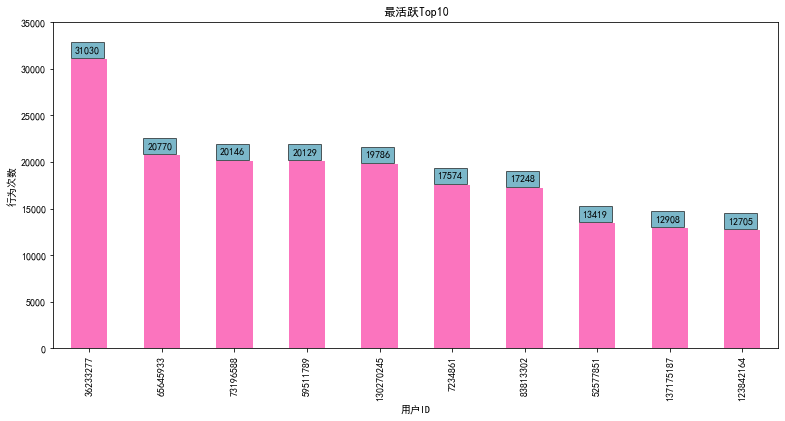

In [8]:
shy = tb['user_id'].value_counts().head(10)
plt.figure(figsize = (13,6))
shy.plot(kind = 'bar',color = '#f91894',alpha = 0.6)
plt.xlabel('用户ID')
plt.ylabel('行为次数')
plt.title('最活跃Top10')
plt.ylim([0,35000])
for x,y in zip(np.arange(10),shy.values):
    plt.text(x-0.2,y+650,y,bbox=dict(facecolor = '#2387a5',alpha = 0.6))


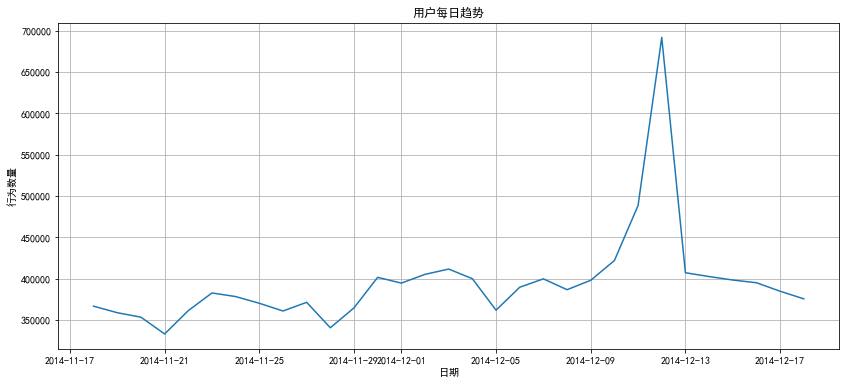

In [16]:
tb['日期'] = tb['time'].dt.date #dt.date用于从datetime类型中提取 "年月日" 去除 "时分秒" 信息
#其它用法 dt.normalize同date但保留 "秒" 
#dt.floor('D')向下取整到天
#dt.strftime('%Y-%m-%d') 自定义日期格式返回字符串
shw = tb.groupby('日期').size() #用日期分组size()统计每一行
plt.figure(figsize = (14,6))
shw.plot()
plt.title('用户每日趋势')
plt.xlabel('日期')
plt.ylabel('行为数量')
plt.grid()
plt.show()


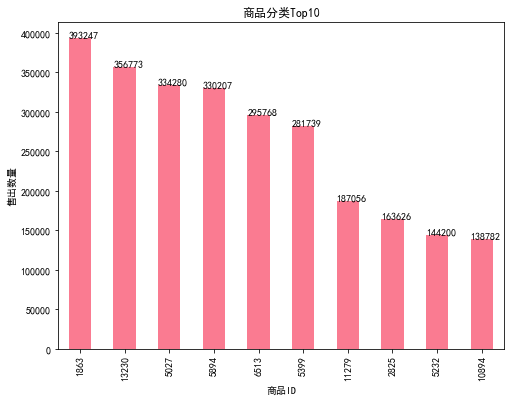

In [10]:
shs = tb['item_category'].value_counts().head(10)
plt.figure(figsize=(8,6))
shs.plot(kind = 'bar',color = '#f84363',alpha = 0.7)
plt.title('商品分类Top10')
plt.xlabel('商品ID')
plt.ylabel('售出数量')
for x,y in zip(np.arange(len(shs.values)),shs.values):
    plt.text(x-0.25,y+10,y)

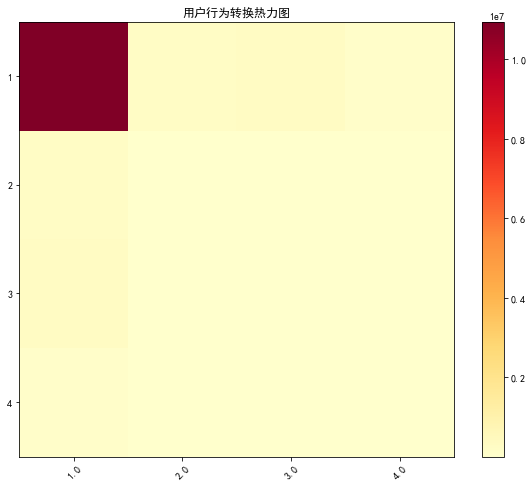

In [17]:
# 找出最常见的用户行为序列（假设数据是按时间排序的）
tb = tb.sort_values(by = ['time'])

# 示例：分析用户从一种行为到另一种行为的转换
tb['next_behavior'] = tb.groupby('user_id')['behavior_type'].shift(-1) # 分组进行下一行为并返回给一个新列表,注意需要是按照时间排序不然无意义
behavior_transition = tb.groupby(['behavior_type', 'next_behavior']).size().unstack()
#先根据行为类别分4组再根据每一组下一个行为再分4组并统计这个行为的数量,将数据矩阵展开并返回变量
# 绘制热力图
plt.figure(figsize=(10, 8))
plt.imshow(behavior_transition, cmap='YlOrRd')#将矩阵中每个数值映射到颜色空间,cmap颜色映射
plt.colorbar()#用来给热力图添加颜色条
plt.xticks(range(len(behavior_transition.columns)), behavior_transition.columns, rotation=45)
plt.yticks(range(len(behavior_transition.index)), behavior_transition.index)
plt.title('用户行为转换热力图')
plt.show()

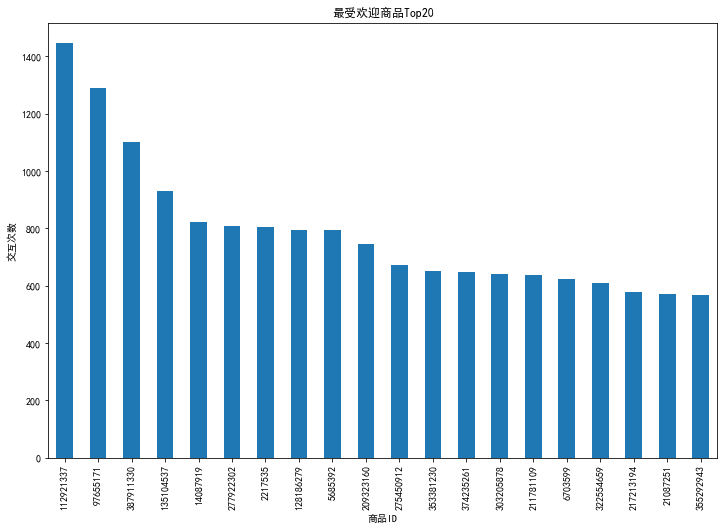

In [12]:
shp = tb['item_id'].value_counts().head(20)
plt.figure(figsize=(12,8))
shp.plot(kind = 'bar')
plt.title('最受欢迎商品Top20')
plt.xlabel('商品ID')
plt.ylabel('交互次数')
plt.show()

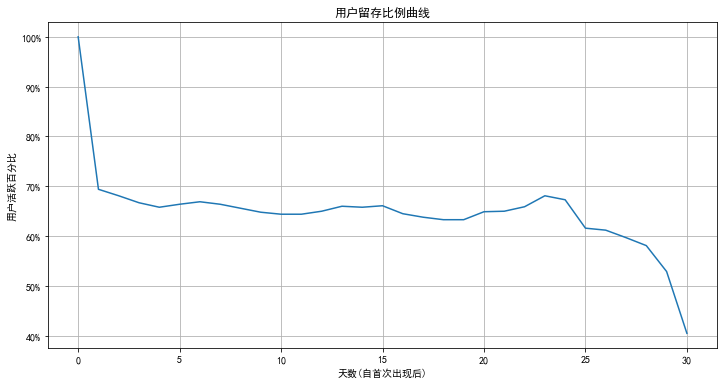

In [18]:
shr = tb.groupby('user_id')['time'].min().reset_index()
shr.columns = ['user_id','new_time']
shl = pd.merge(tb,shr,on='user_id')
shl['-time'] = (shl['time'] - shl['new_time']).dt.days
shk = shl.groupby('-time')['user_id'].nunique()
base = shk.iloc[0]
shm = (shk / base*100).round(1)
plt.figure(figsize = (12,6))
shm.plot()
plt.title('用户留存比例曲线')
plt.yticks(np.arange(40,110,10),['40%','50%','60%','70%','80%','90%','100%'])
plt.xlabel('天数(自首次出现后)')
plt.ylabel('用户活跃百分比')
plt.grid()
plt.show()

In [14]:
# 将一些统计结果保存到Excel
with pd.ExcelWriter('统计结果.xlsx') as writer:
    shs.to_excel(writer, sheet_name='商品分类统计')
    shiv.to_excel(writer, sheet_name='行为统计')
    shm.to_excel(writer, sheet_name='每日活跃度')